
# Credit EDA Case Study - part I




### Business Objectives
 
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which  may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 

#### Analysis is divided into four parts by merging provided data sets ('application_data.csv'):

  1. Data understanding
  2. Data cleaning
  3. Data Analysis
  4. Observations

In [1]:
import numpy as np
import pandas as pd

# import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### Anlysis on first data set.

We shall identify the attributes which impact whether or not client's have difficulties in making loan payments and finally we will use the same derive some inferences. 

In [2]:

# Read application data csv file.
df = pd.read_csv("application_data.csv", low_memory=False)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data understanding for application_data.csv

In [3]:
# Explore shape of data frame - approx 30k rows and 122 columns.

df.shape

(307511, 122)

In [4]:
# Explore info of Data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Summary Statistics for each column.

df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
# Observe the features(columns) available and choose the improtant one's for analysis.
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Data cleaning for application_data.csv

#### Identifying Missing Values

The methods ```isnull()``` and ```notnull()``` are the most common ways of identifying missing values. 

While handling missing data, we first need to identify the rows and columns containing missing values, count the number of missing values, and then decide how to treat them.

It is important that to **treat missing values in each column separately**, rather than implementing a single solution (e.g. replacing NaNs by the mean of a column) for all columns.

In [7]:
# summing up the missing values (column-wise)
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [8]:
# percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OWN_CAR_AGE                   66.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE     

In [9]:
# Removing the columns having at least 50% missing values.

columns_to_drop = df.columns[100*(df.isnull().sum()/len(df.index)) >= 50]
print(columns_to_drop.tolist())
print(len(columns_to_drop))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']
41


So as seen above we have 41 of the columns having atleast 50% of the missing values. So we will drop these columns.

In [10]:
# Drop above columns from data frame.

df = df.drop(columns_to_drop, axis=1)
print(df.shape)

(307511, 81)


In [11]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [12]:
# Check % of missing values.
(df.isnull().sum()/len(df.index)) * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [13]:
# Check variables having atleast 30% of missing values.
columns = df.columns[100*(df.isnull().sum()/len(df.index)) >= 30]
print(columns)

Index(['OCCUPATION_TYPE', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')


In the above columns we can check how each one of them affect the TARGET variable. 
If it has minor impact on the target then it's safe to drop those variables which has around 30% missing values.

So assuming below variables are safe to drop except **'OCCUPATION_TYPE'**
'YEARS_BEGINEXPLUATATION_AVG', 
'FLOORSMAX_AVG',
'YEARS_BEGINEXPLUATATION_MODE', 
'FLOORSMAX_MODE',
'YEARS_BEGINEXPLUATATION_MEDI', 
'FLOORSMAX_MEDI', 
'TOTALAREA_MODE',
'EMERGENCYSTATE_MODE'

In [14]:
columns_to_drop = ['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE']
df = df.drop(columns_to_drop, axis=1)
print(df.shape)

(307511, 73)


In [15]:
# Check % of missing values.
(df.isnull().sum()/len(df.index)) * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


So by far we have reduced our missing values to ~30% column-wise, so before moving to imputation for selected columns on which we perform analysis we shall run the same missing values check row-wise.

### Treating Missing Values in Columns

Let's now treat missing values in columns. Let's look at the number of NaNs in each column again, this time as the *percentage of missing values in each column*. Notice that we calculate the number of rows as ```len(df.index)```.

In [16]:
# Explore columns having missing values more thatn 5%.

print(df.shape)

print(df.columns[100*(df.isnull().sum()/len(df.index)) >= 5])

# As we can see from the results that 'OCCUPATION_TYPE' has ~32% missing values.
print(df['OCCUPATION_TYPE'].value_counts())

(307511, 73)
Index(['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


We shall drop **OCCUPATION_TYPE** by observing above values, If we try to impute missing values in **OCCUPATION_TYPE** with **Laborers** which approximately constitutes to **~18%(47398/265965)** of the total occupations, this would result in biased imputation and analysis since Laborers contitutes just 18% overall. So we shall consider to drop this column.

In [17]:
df = df.drop('OCCUPATION_TYPE', axis=1)
print(df.shape)

print(# Check % of missing values.
(df.isnull().sum()/len(df.index)) * 100)

(307511, 72)
SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLA

In [18]:
# Print final list of available colmuns before imputation and analysis.
print(df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

#### Select attributes(features - independant variables) for our analysis.

We can consider below attributes(independant variables) for our analysis on how these impact our 'TARGET' variable, Also at the end of this first set of analysis we will put our observations on how some of these variables impact the client's difficulty in paying their installments. Which eventually identifies the attributes that affect default rate the most.

    1. NAME_CONTRACT_TYPE          - Identification if loan is cash or revolving
    2. FLAG_OWN_REALTY             - Flag if client owns a house or flat
    3. AMT_INCOME_TOTAL            - Income of the client.
    4. AMT_CREDIT                  - Credit amount of the loan
    5. NAME_INCOME_TYPE            - Clients income type (businessman, working, maternity leave,Ö)
    6. NAME_EDUCATION_TYPE         - Level of highest education the client achieved.
    7. NAME_HOUSING_TYPE           - What is the housing situation of the client
    8. REGION_RATING_CLIENT_W_CITY - Our rating of the region where client lives.
    9. AMT_REQ_CREDIT_BUREAU_QRT  - Number of enquiries to Credit Bureau about the client 3 month before application                                

In [19]:
columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY','AMT_INCOME_TOTAL', 
           'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
           'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'AMT_REQ_CREDIT_BUREAU_QRT']
sliced_data = df[columns].copy()
sliced_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,Y,202500.000,406597.5,Working,Secondary / secondary special,House / apartment,2,0.0
1,100003,0,Cash loans,N,270000.000,1293502.5,State servant,Higher education,House / apartment,1,0.0
2,100004,0,Revolving loans,Y,67500.000,135000.0,Working,Secondary / secondary special,House / apartment,2,0.0
3,100006,0,Cash loans,Y,135000.000,312682.5,Working,Secondary / secondary special,House / apartment,2,NaN
4,100007,0,Cash loans,Y,121500.000,513000.0,Working,Secondary / secondary special,House / apartment,2,0.0
5,100008,0,Cash loans,Y,99000.000,490495.5,State servant,Secondary / secondary special,House / apartment,2,1.0
6,100009,0,Cash loans,Y,171000.000,1560726.0,Commercial associate,Higher education,House / apartment,2,1.0
7,100010,0,Cash loans,Y,360000.000,1530000.0,State servant,Higher education,House / apartment,3,0.0
8,100011,0,Cash loans,Y,112500.000,1019610.0,Pensioner,Secondary / secondary special,House / apartment,2,0.0
9,100012,0,Revolving loans,Y,135000.000,405000.0,Working,Secondary / secondary special,House / apartment,2,NaN


In [20]:
sliced_data.isnull().sum()/len(sliced_data.index) * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
FLAG_OWN_REALTY                 0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_HOUSING_TYPE               0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
dtype: float64

Now we have final data frame for analysis with selected variables. We shall now proceed with missing value imputation and data type verifications for these variables. 
As seen above **AMT_REQ_CREDIT_BUREAU_QRT** needs data imputation so we shall find a strategy to impute for **AMT_REQ_CREDIT_BUREAU_QRT**.

In [21]:
sliced_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


A good way to estimate the 'spread of data' is to look at the difference between the mean and the median (lower the better).
Thus, let's impute the missing values by the mean value.

In [22]:
# imputing AMT_REQ_CREDIT_BUREAU_QRT by mean value.
sliced_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna((sliced_data['AMT_REQ_CREDIT_BUREAU_QRT'].mean()), inplace=True)
sliced_data.isnull().sum()/len(sliced_data.index) * 100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
FLAG_OWN_REALTY                0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_HOUSING_TYPE              0.0
REGION_RATING_CLIENT_W_CITY    0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
dtype: float64

Now as we can see our data is finally treated and ready for analysis, also we can note that we dont have any other variables which requires data imputation since they dont have any missing data. 

So just before starting analysis, we shall make sure the data types of all our attributes are proper and will derive binned variables if required to help our analysis.

### Observe data types.

In [23]:
sliced_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
FLAG_OWN_REALTY                 object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_HOUSING_TYPE               object
REGION_RATING_CLIENT_W_CITY      int64
AMT_REQ_CREDIT_BUREAU_QRT      float64
dtype: object

Here we can see that we  need to convert **FLAG_OWN_REALTY** to int64 since its either 0 or 1.

In [24]:
sliced_data['FLAG_OWN_REALTY'] = sliced_data['FLAG_OWN_REALTY'].apply(lambda x: pd.to_numeric(1 if x == 'Y' else 0))
sliced_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
FLAG_OWN_REALTY                  int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_HOUSING_TYPE               object
REGION_RATING_CLIENT_W_CITY      int64
AMT_REQ_CREDIT_BUREAU_QRT      float64
dtype: object

### Check for outliers.


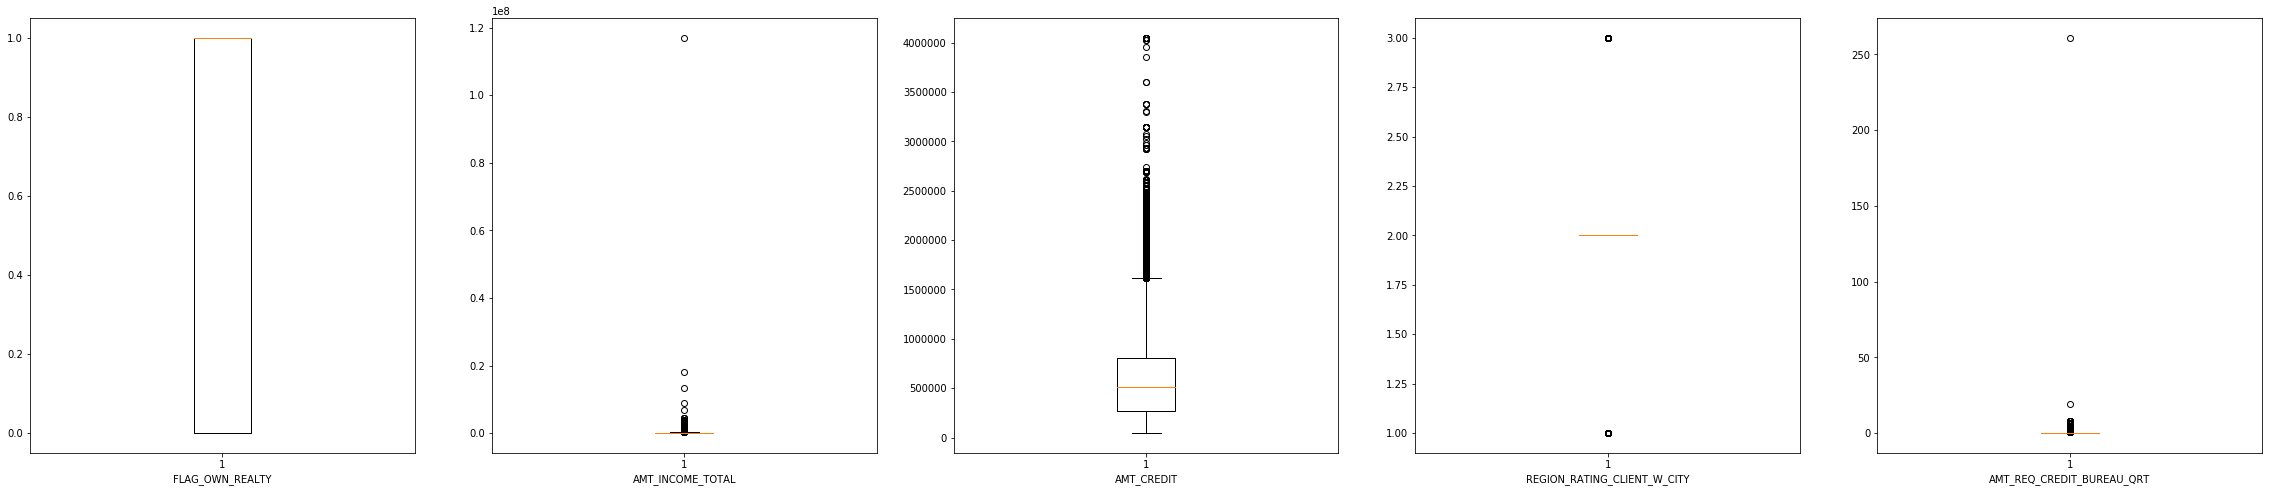

In [25]:
numeric_columns = ['int64', 'float64']
numeric_df = sliced_data.select_dtypes(include=numeric_columns)
numeric_df = numeric_df.drop(['SK_ID_CURR', 'TARGET'], axis = 1)

fig, axes = plt.subplots(1,5,figsize=(40,8))
for index, column in enumerate(numeric_df.columns):
    ax = axes.flatten()[index]
    ax.boxplot(numeric_df[column])
    ax.set_xlabel(column)

### Outlier detection and treatment.

#### Detection:

Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot. Some of the thumb rules to detect outliers are:

1. Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
2. Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
3. Data points, three or more standard deviation away from mean are considered outlier

#### Treatment:

Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods.

some of the common techniques used to deal with outliers:

1. Deleting observations: We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Transforming and binning values: Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values. Binning is also a form of variable transformation. Decision Tree algorithm allows to deal with outliers well due to binning of variable. We can also use the process of assigning weights to different observations.


From the above box plots we can say that below attributes are affected with outliers, 

1. **AMT_INCOME_TOTAL**
2. **AMT_CREDIT** 
3. **AMT_REQ_CREDIT_BUREAU_QRT** 

these outliers can be treated from one of the suitable steps mentioned above, such as either we can delete extreme values or Natural log of a value reduces the variation caused by extreme values.

Treatment approach for below attributes,

1. **AMT_INCOME_TOTAL**           - Apply natural log scale for values which can reduce variation.
2. **AMT_CREDIT**                 - Apply natural log scale for values which can reduce variation.
3. **AMT_REQ_CREDIT_BUREAU_QRT**  - Delete extreme values.


### Binning of variables:

We will apply binning for below variable,

1. **AMT_INCOME_TOTAL** - Low, medium and high.

In [26]:
# Bin annual income in to low, medium and high slabs. 
sliced_data['AMT_INCOME_TOTAL_Binned'] = pd.qcut(sliced_data['AMT_INCOME_TOTAL'], 3, labels=["Low", "medium", "high"])
sliced_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_QRT,AMT_INCOME_TOTAL_Binned
0,100002,1,Cash loans,1,202500.0,406597.5,Working,Secondary / secondary special,House / apartment,2,0.000000,high
1,100003,0,Cash loans,0,270000.0,1293502.5,State servant,Higher education,House / apartment,1,0.000000,high
2,100004,0,Revolving loans,1,67500.0,135000.0,Working,Secondary / secondary special,House / apartment,2,0.000000,Low
3,100006,0,Cash loans,1,135000.0,312682.5,Working,Secondary / secondary special,House / apartment,2,0.265474,medium
4,100007,0,Cash loans,1,121500.0,513000.0,Working,Secondary / secondary special,House / apartment,2,0.000000,medium


## Data Analysis for application_data.csv

We will now start our data analysis on the final data frame we have prepared with selected attributes.

### Check the imbalance percentage:

In [27]:
# Use value counts by passing normalize as TRUE to get the relative frequencies of the unique values.
print(sliced_data['TARGET'].value_counts(normalize=True) * 100)

imbalance_percentage = round(91.927118/8.072882, 2)
imbalance_percentage

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


11.39

From the above data we can say that the imbalance percentage is coming to around 11.40%. which inturn indicates that client with payment diffculties is roughly 11 times lesser than clients making timely payments. 

91% of the clients have no difficulties in making payments - payment is paid on time.

### Divide the data in to two sets (TARGET variable with 0 and 1):

In [28]:
# Divide data frame based on TARGET.

groupby_df = dict(tuple(sliced_data.groupby('TARGET')))
df_0 = groupby_df[0]
df_1 = groupby_df[1]

### Univariate analysis for categorical variables.

Selected categorical variables for our analysis,

1. **NAME_CONTRACT_TYPE**
2. **NAME_INCOME_TYPE**
3. **NAME_EDUCATION_TYPE**

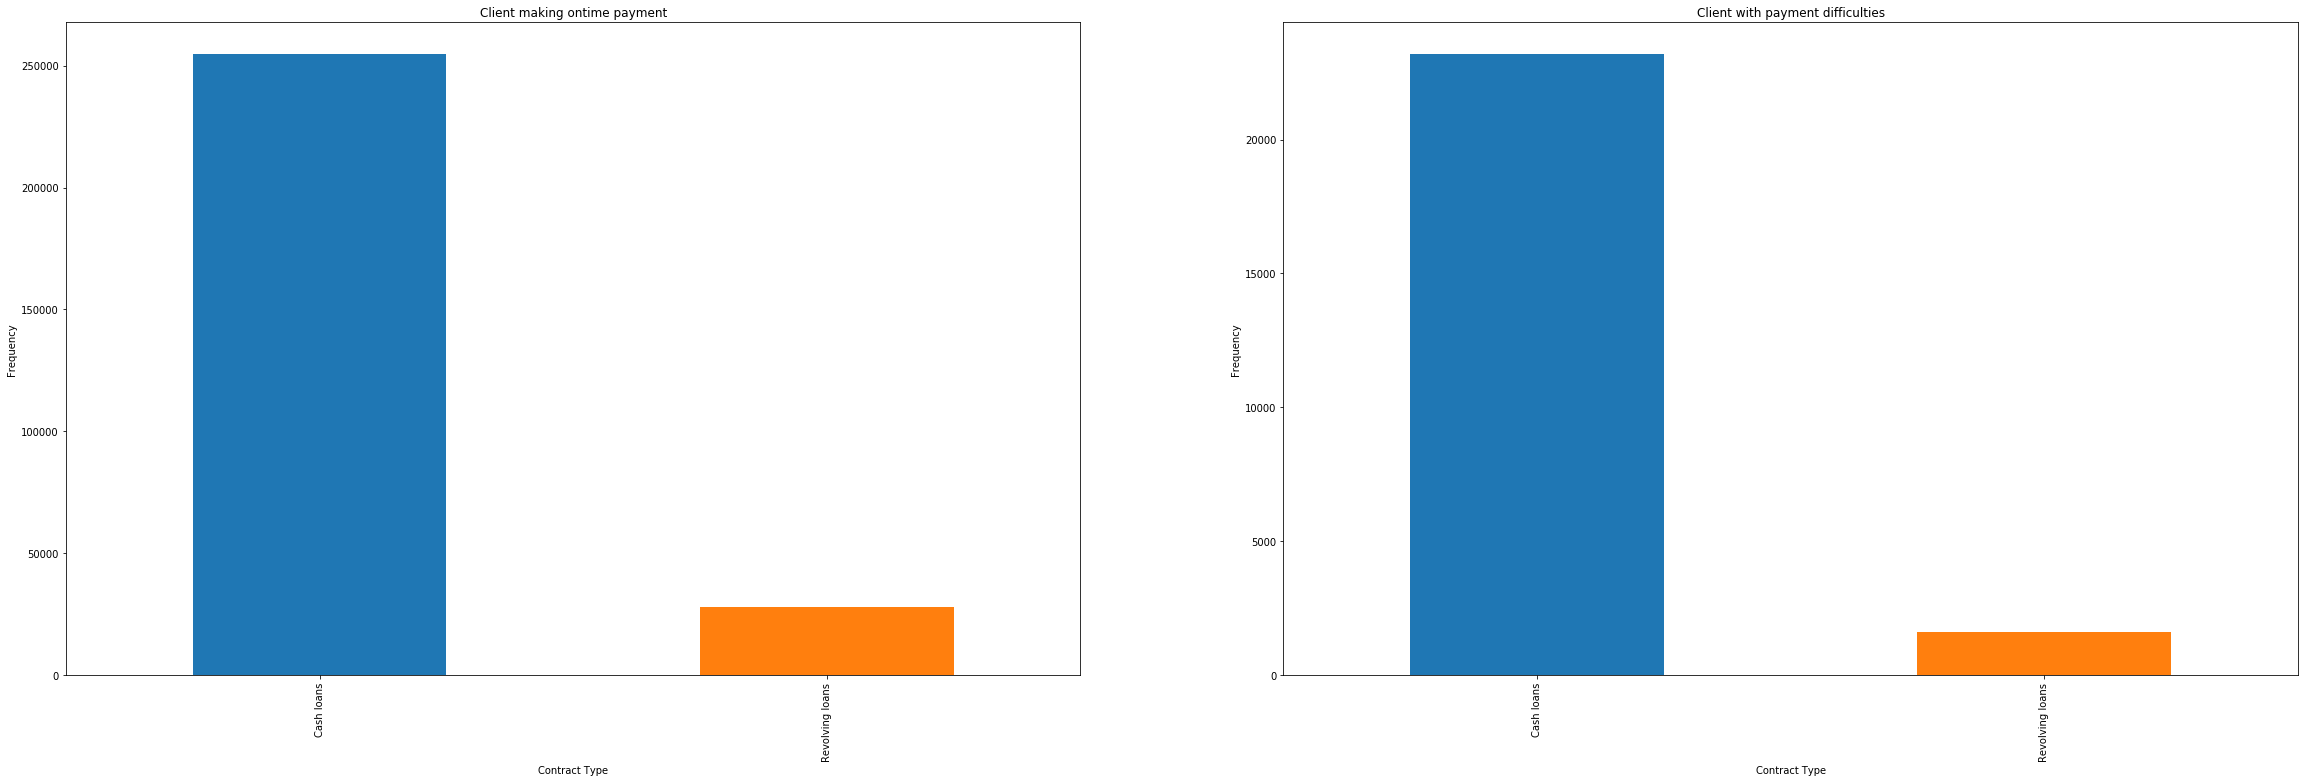

In [29]:

# NAME_CONTRACT_TYPE analysis for TARGET 0 and 1
fig, axes = plt.subplots(1,2,figsize=(40,12))

def plot_categorical(axis, variable, data_frame, title, x_label, y_label):
    data_frame[variable].value_counts().plot(ax=axes[axis], kind='bar')
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_title(title)
    
plot_categorical(0, 'NAME_CONTRACT_TYPE', df_0, 'Client making ontime payment', 'Contract Type', 'Frequency')
plot_categorical(1, 'NAME_CONTRACT_TYPE', df_1, 'Client with payment difficulties', 'Contract Type', 'Frequency')


### Inferences for loan contract type:

It can observed from the above plots that for both the categories of our target variable 
**Cash loans** tend to have higher contribution than **Revolving loans**.

Observation for TARGET = 0 **All other cases when the payment is paid on time.**

* clients are making payments on time for cash loans
* On the other hand clients with Revolving loan type has lesser contribution of making payments on time.

Observation for TARGET = 1 **client with payment difficulties**

* clients are having difficulties in making payments for cash loans
* On the other hand clients with Revolving loan type has lesser contribution of having difficulties in making payments for cash loans

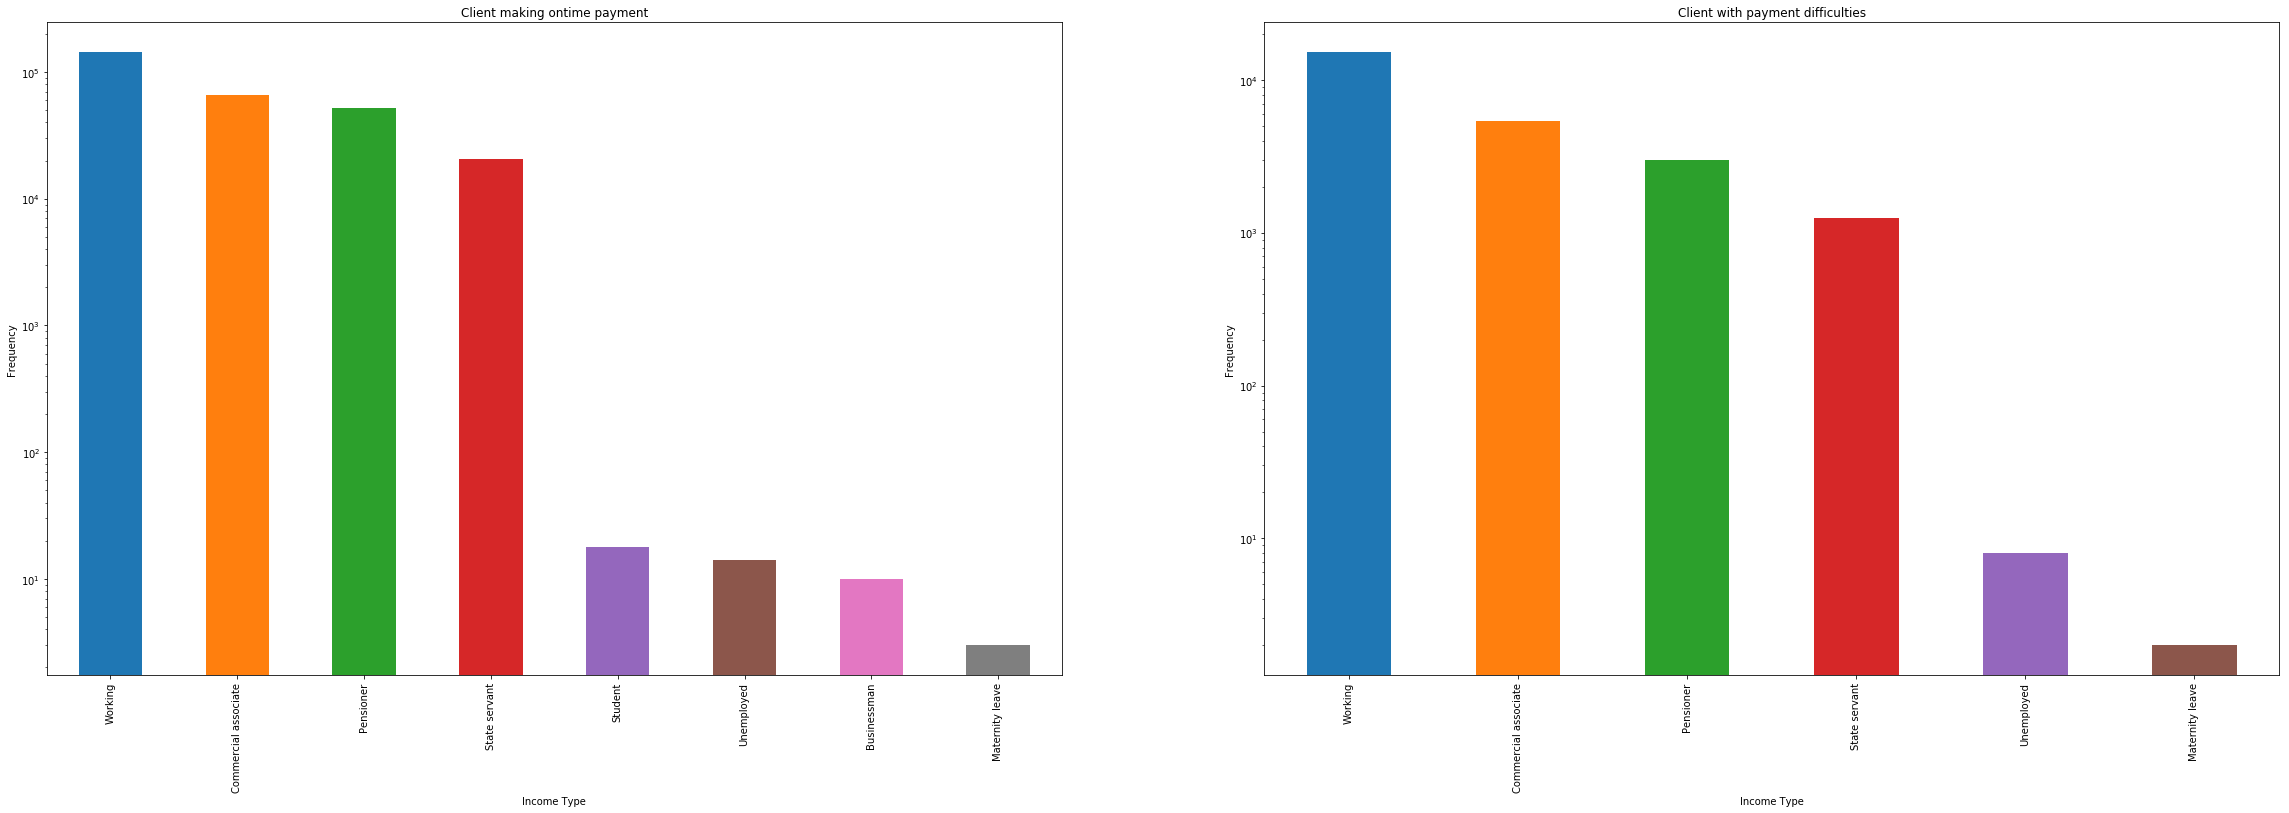

In [30]:

# NAME_INCOME_TYPE analysis for Target variable.
fig, axes = plt.subplots(1,2,figsize=(40,12))

def plot_categorical(axis, variable, data_frame, title, x_label, y_label):
    data_frame[variable].value_counts().plot(ax=axes[axis], kind='bar')
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_yscale('log')
    axes[axis].set_title(title)
    
plot_categorical(0, 'NAME_INCOME_TYPE', df_0, 'Client making ontime payment', 'Income Type', 'Frequency')
plot_categorical(1, 'NAME_INCOME_TYPE', df_1, 'Client with payment difficulties', 'Income Type', 'Frequency')

### Inferences for clients income type:

Observation for TARGET = 0 **All other cases when the payment is paid on time.**

* clients are more likely to make payments on time for income categories such as Working, 
  commercial associate, pensioner and state servant.
* On the other hand clients like students, unemployed, businessman and with maternity leave have lesser contribution   to make payments on time.

Observation for TARGET = 1 **client with payment difficulties**

* clients are more likely to have difficulties in making payments for income categories such as Working, 
  commercial associate, pensioner and state servant.
* On the other hand clients with Runemployed, and with maternity leave has lesser contribution of having difficulties in making payments for cash loans

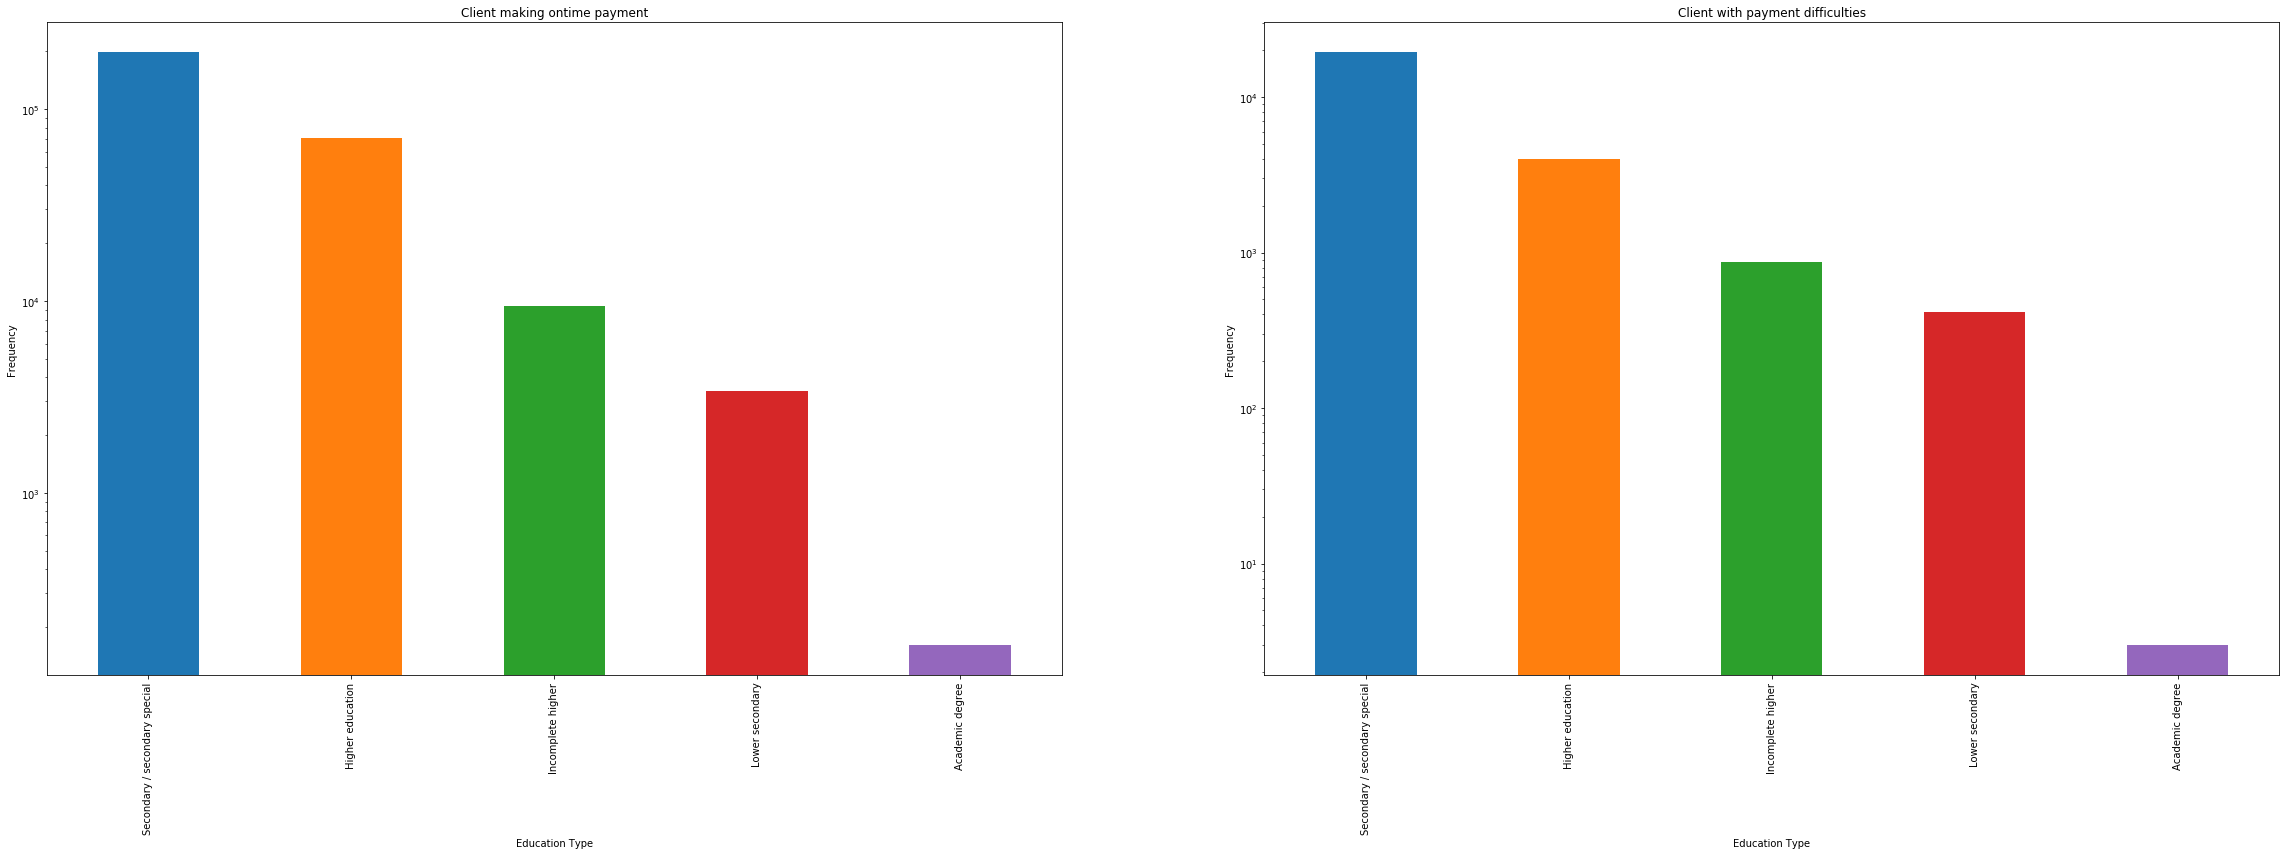

In [31]:
# NAME_EDUCATION_TYPE analysis for TARGET 0 and 1
fig, axes = plt.subplots(1,2,figsize=(40,12))

def plot_categorical(axis, variable, data_frame, title, x_label, y_label):
    data_frame[variable].value_counts().plot(ax=axes[axis], kind='bar')
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_yscale('log')
    axes[axis].set_title(title)
    
plot_categorical(0, 'NAME_EDUCATION_TYPE', df_0, 'Client making ontime payment', 'Education Type', 'Frequency')
plot_categorical(1, 'NAME_EDUCATION_TYPE', df_1, 'Client with payment difficulties', 'Education Type', 'Frequency')

### Inferences for clients Education type:

Observation for TARGET = 0 **All other cases when the payment is paid on time.**

* clients are more likely to make payments on time for education categories such as Secondary, Higher education, Incomplete higher and Lower secondary.
* On the other hand clients with academic degree have lesser contribution to make payments on time.

Observation for TARGET = 1 **client with payment difficulties**

* clients are more likely to have difficulties in making payments for education categories such as Secondary, Higher education, Incomplete higher and Lower secondary.
* On the other hand clients with with academic degree have lesser contribution of having difficulties in making payments for cash loans

### Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable)

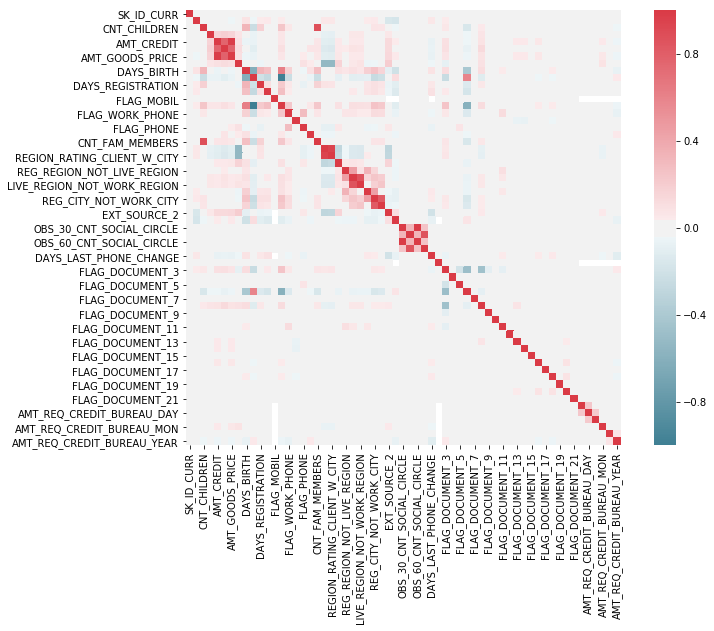

In [32]:
cor_matrix_df = df.corr()

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cor_matrix_df, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, 
            ax=ax)

In [33]:
# Top 10 correlated attributes.

sol = (cor_matrix_df.where(np.triu(np.ones(cor_matrix_df.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol[:10]

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998490
AMT_CREDIT                  AMT_GOODS_PRICE                0.986968
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.950842
CNT_CHILDREN                CNT_FAM_MEMBERS                0.879161
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.860627
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.860517
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.825575
AMT_ANNUITY                 AMT_GOODS_PRICE                0.775109
AMT_CREDIT                  AMT_ANNUITY                    0.770138
DAYS_BIRTH                  FLAG_EMP_PHONE                 0.619888
dtype: float64

### Top 10 correlated variables:

    1.  OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998490
    2.  AMT_CREDIT                  AMT_GOODS_PRICE                0.986968
    3.  REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.950842
    4.  CNT_CHILDREN                CNT_FAM_MEMBERS                0.879161
    5.  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.860627
    6.  DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.860517
    7.  REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.825575
    8.  AMT_ANNUITY                 AMT_GOODS_PRICE                0.775109
    9.  AMT_CREDIT                  AMT_ANNUITY                    0.770138
    10. DAYS_BIRTH                  FLAG_EMP_PHONE                 0.619888


So from the above data we can see **OBS_30_CNT_SOCIAL_CIRCLE** and **OBS_60_CNT_SOCIAL_CIRCLE** is highly correlated.
which is followed by **AMT_CREDIT** and **AMT_GOODS_PRICE** and so on as shown in above list.

### Find Correlation  for selected numeric variables.

In [34]:
numeric_columns = ['int64', 'float64']
numeric_df_0 = df_0.select_dtypes(include=numeric_columns)

# Find correlation.
corr_matrix_0 = numeric_df_0.corr()
corr_matrix_0

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_QRT
SK_ID_CURR,1.000000,NaN,0.000841,0.001739,-0.000342,-0.000739,0.001070
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,0.000841,NaN,1.000000,0.002061,-0.041648,0.003161,0.014296
AMT_INCOME_TOTAL,0.001739,NaN,0.002061,1.000000,0.342799,-0.200466,0.011406
AMT_CREDIT,-0.000342,NaN,-0.041648,0.342799,1.000000,-0.112238,0.016656
REGION_RATING_CLIENT_W_CITY,-0.000739,NaN,0.003161,-0.200466,-0.112238,1.000000,0.004323
AMT_REQ_CREDIT_BUREAU_QRT,0.001070,NaN,0.014296,0.011406,0.016656,0.004323,1.000000


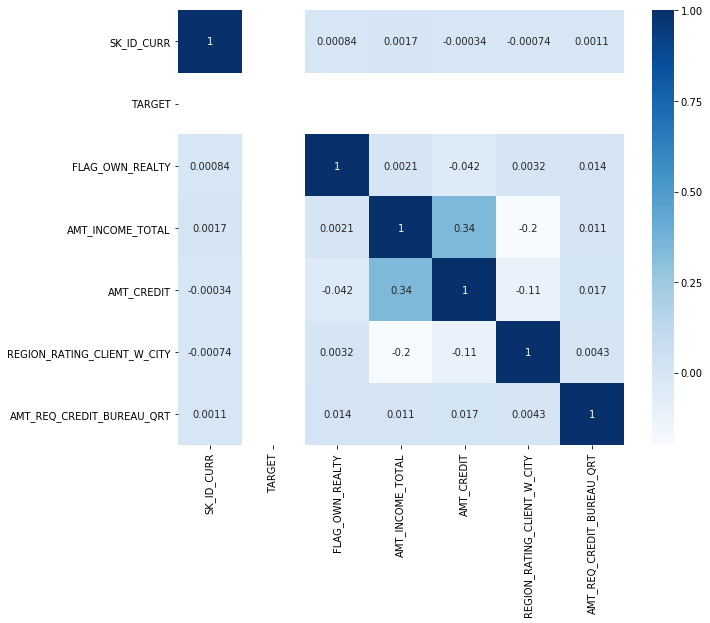

In [35]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr_matrix_0, cmap="Blues", annot=True)
plt.show()

### Inferences from above data for TARGET = 0:

* AMT_INCOME_TOTAL and AMT_CREDIT are the variables with highest correlation with 0.34.
* AMT_INCOME_TOTAL and REGION_RATING_CLIENT_W_CITY has negative correlation with -0.2.

In [36]:
numeric_columns = ['int64', 'float64']
numeric_df_1 = df_1.select_dtypes(include=numeric_columns)

# Find correlation.
corr_matrix_1 = numeric_df_1.corr()
corr_matrix_1

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_QRT
SK_ID_CURR,1.000000,NaN,-0.001025,-0.010165,-0.001290,-0.004135,-0.000783
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,-0.001025,NaN,1.000000,0.007910,-0.011225,-0.007924,0.016394
AMT_INCOME_TOTAL,-0.010165,NaN,0.007910,1.000000,0.038131,-0.022808,-0.001178
AMT_CREDIT,-0.001290,NaN,-0.011225,0.038131,1.000000,-0.071377,-0.016101
REGION_RATING_CLIENT_W_CITY,-0.004135,NaN,-0.007924,-0.022808,-0.071377,1.000000,0.007670
AMT_REQ_CREDIT_BUREAU_QRT,-0.000783,NaN,0.016394,-0.001178,-0.016101,0.007670,1.000000


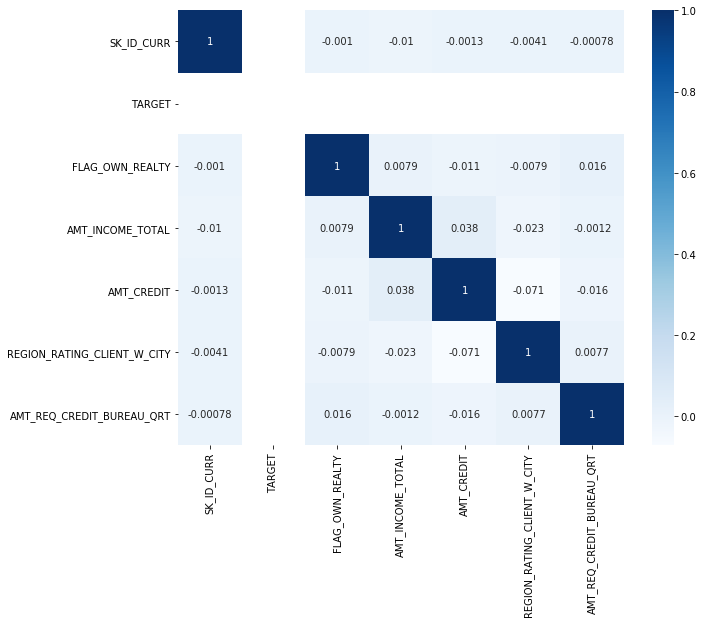

In [37]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr_matrix_1, cmap="Blues", annot=True)
plt.show()

### Inferences from above data for TARGET = 1:

* AMT_INCOME_TOTAL and AMT_CREDIT are the variables with highest correlation with 0.038.
* AMT_CREDIT and REGION_RATING_CLIENT_W_CITY has negative correlation with -0.071.

### Univariate analysis for Numerical variables.

Selected categorical variables for our analysis,

1. **AMT_INCOME_TOTAL**
2. **AMT_CREDIT**

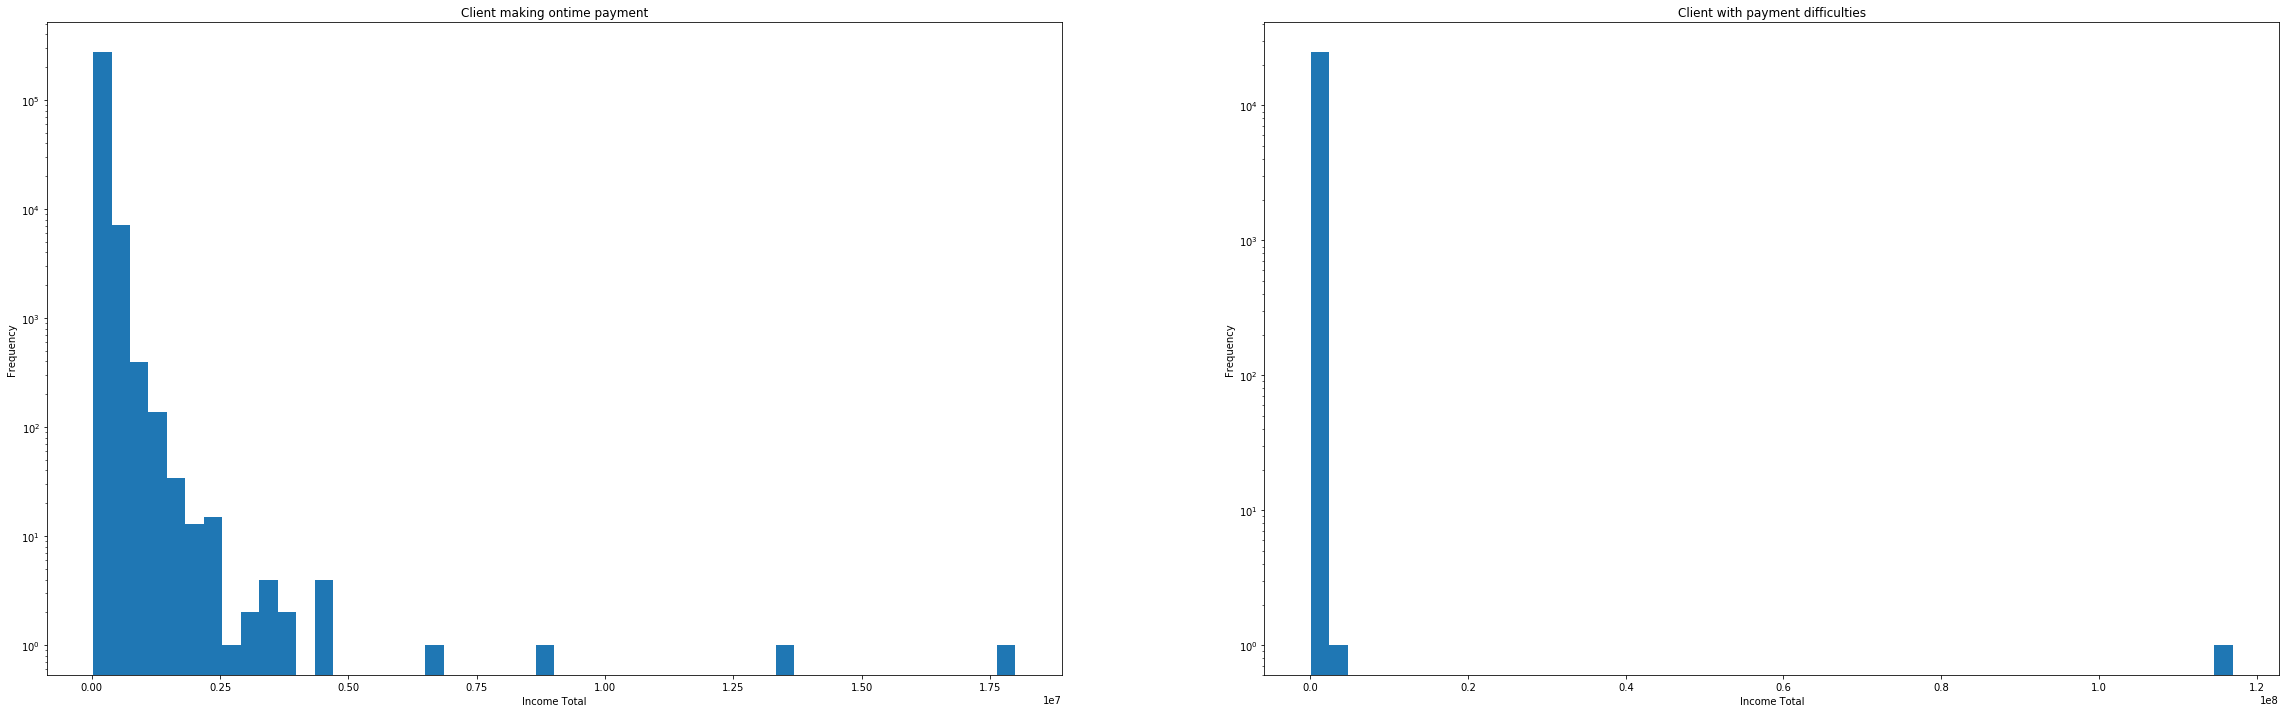

In [38]:
# AMT_INCOME_TOTAL analysis for Target variable.
fig, axes = plt.subplots(1,2,figsize=(40,12))

def plot_numerical(axis, variable, data_frame, title, x_label, y_label):
    data_frame[variable].plot(ax=axes[axis], kind='hist', bins=50)
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_yscale('log')
    axes[axis].set_title(title)
    
plot_numerical(0, 'AMT_INCOME_TOTAL', df_0, 'Client making ontime payment', 'Income Total', 'Frequency')
plot_numerical(1, 'AMT_INCOME_TOTAL', df_1, 'Client with payment difficulties', 'Income Total', 'Frequency')

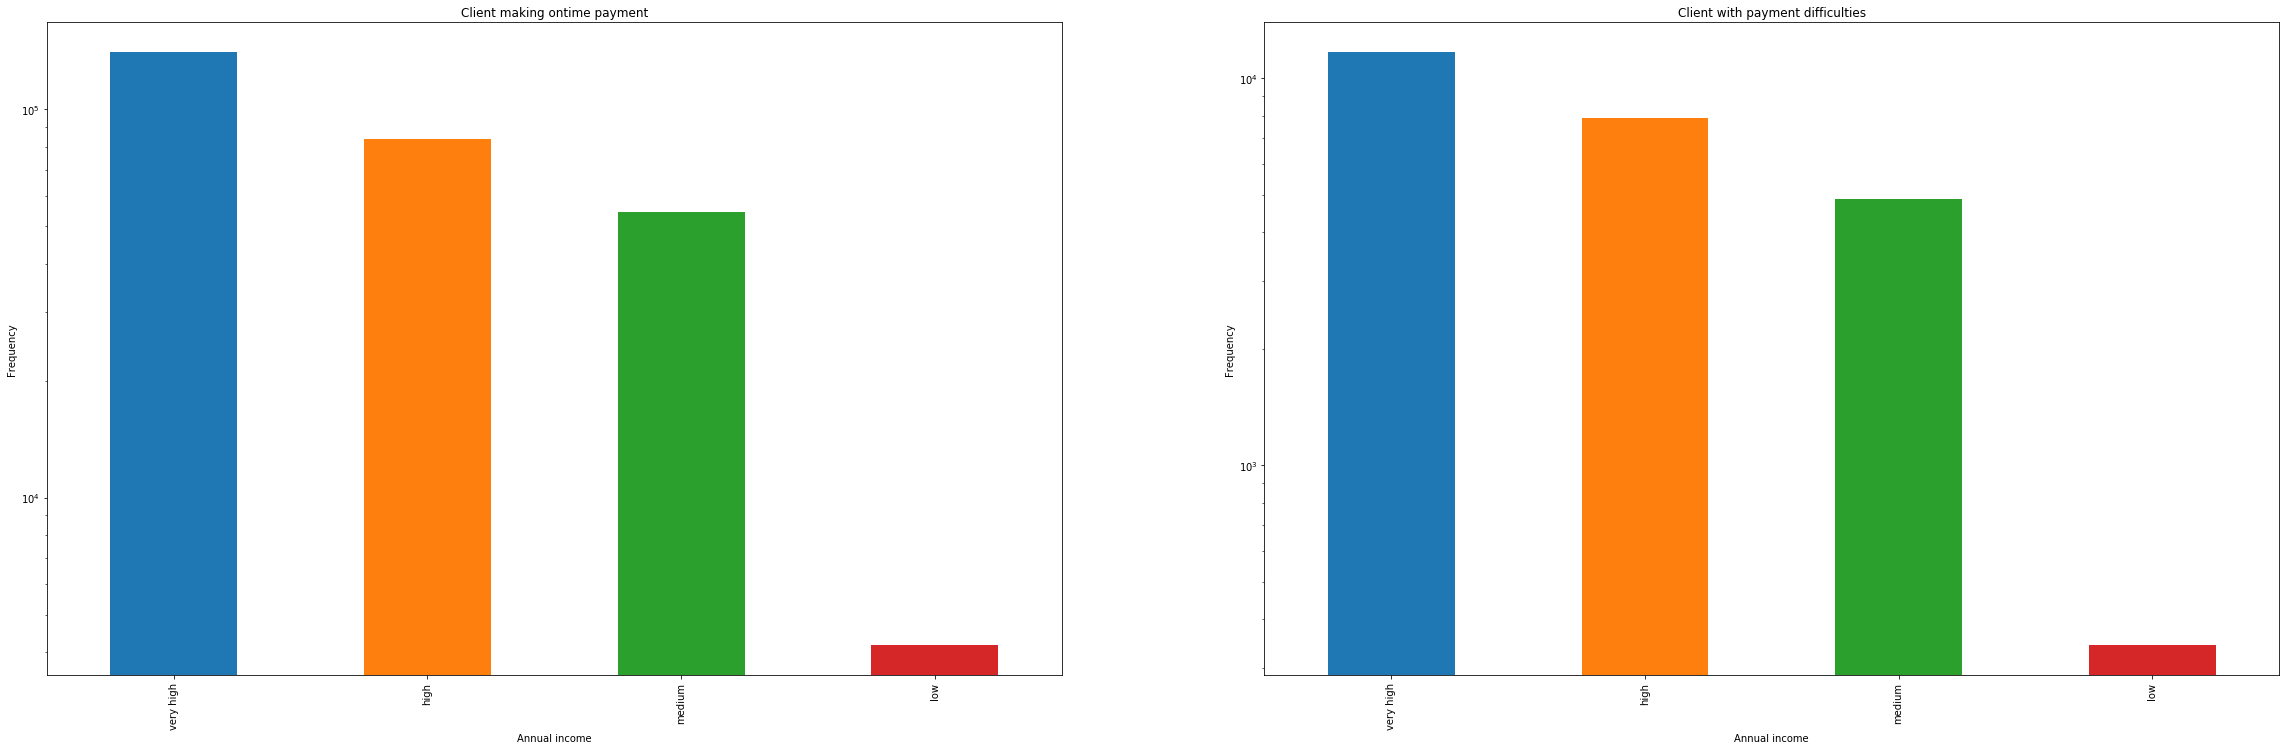

In [39]:
# AMT_INCOME_TOTAL
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df_0['annual_inc_binnned'] = df_0['AMT_INCOME_TOTAL'].apply(lambda x: annual_income(x))
df_1['annual_inc_binnned'] = df_1['AMT_INCOME_TOTAL'].apply(lambda x: annual_income(x))

# Plot data.
fig, axes = plt.subplots(1,2,figsize=(40,12))

def plot_categorical(axis, variable, data_frame, title, x_label, y_label):
    data_frame[variable].value_counts().plot(ax=axes[axis], kind='bar')
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_yscale('log')
    axes[axis].set_title(title)
    
plot_categorical(0, 'annual_inc_binnned', df_0, 'Client making ontime payment', 'Annual income', 'Frequency')
plot_categorical(1, 'annual_inc_binnned', df_1, 'Client with payment difficulties', 'Annual income', 'Frequency')

### Inferences for  Income slab:

Observation for TARGET = 0 **All other cases when the payment is paid on time.**

* clients are more likely to make payments on time for very high, hig and medium income slabs
* On the other hand clients with low income slabs have lesser contribution to make payments on time.

### Bivariate analysis for Numerical variables.

Selected numerical variables for our analysis,

1. **AMT_INCOME_TOTAL** and **AMT_CREDIT**

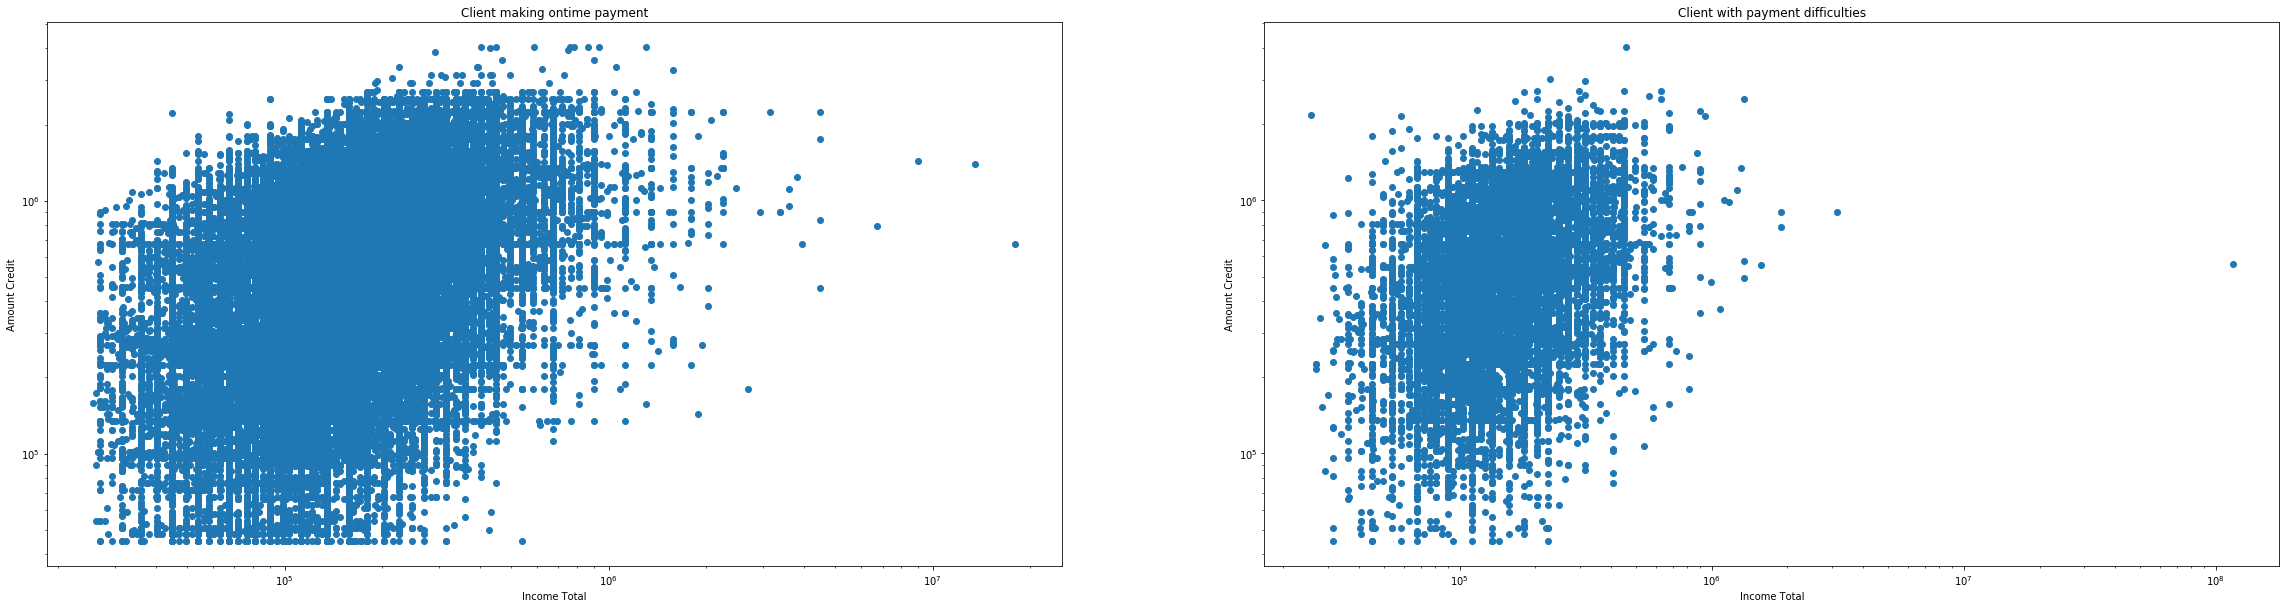

In [41]:
# Plot data.
fig, axes = plt.subplots(1,2,figsize=(40,10))

def plot_bivariate(axis, variable1, variable2, data_frame, title, x_label, y_label):
    axes[axis].scatter(data_frame[variable1], data_frame[variable2])
    axes[axis].set_xlabel(x_label)
    axes[axis].set_ylabel(y_label)
    axes[axis].set_yscale('log')
    axes[axis].set_xscale('log')
    axes[axis].set_title(title)
    
plot_bivariate(0, 'AMT_INCOME_TOTAL', 'AMT_CREDIT', df_0, 'Client making ontime payment', 'Income Total', 'Amount Credit')
plot_bivariate(1, 'AMT_INCOME_TOTAL', 'AMT_CREDIT', df_1, 'Client with payment difficulties', 'Income Total', 'Amount Credit')

### Inferences from above plot:

From the above plot we can observe the following,

1. There seems to be positive correlation between between variables - Income total and Amount credit.
2. So if Total income increases then there is possible chance to increase the credit amount of the loan.

## Observations : Inferences from the analysis of 'application_data.csv':


#### Selected attributes(features - independant variables) for our analysis.

We considered below attributes(independant variables) for our analysis on how these impact our 'TARGET' variable, Also at the end of this first set of analysis we will put our observations on how some of these variables impact the client's difficulty in paying their installments. Which eventually identifies the attributes that affect default rate the most.

    1. NAME_CONTRACT_TYPE          - Identification if loan is cash or revolving
    2. FLAG_OWN_REALTY             - Flag if client owns a house or flat
    3. AMT_INCOME_TOTAL            - Income of the client.
    4. AMT_CREDIT                  - Credit amount of the loan
    5. NAME_INCOME_TYPE            - Clients income type (businessman, working, maternity leave,Ö)
    6. NAME_EDUCATION_TYPE         - Level of highest education the client achieved.
    7. NAME_HOUSING_TYPE           - What is the housing situation of the client
    8. REGION_RATING_CLIENT_W_CITY - Our rating of the region where client lives.
    9. AMT_REQ_CREDIT_BUREAU_QRT  - Number of enquiries to Credit Bureau about the client 3 month before application                                
   
   
Imbalance percentage is coming to around 11.40%. which inturn indicates that client with payment diffculties is roughly 11 times lesser than clients making timely payments. overall 91% of the clients have no difficulties in making payments - payment is paid on time.

### Inferences for loan contract type:

It can observed from the above plots that for both the categories of our target variable 
**Cash loans** tend to have higher contribution than **Revolving loans**.

Observation for TARGET = 0 **All other cases when the payment is paid on time.**

* clients are making payments on time for cash loans
* On the other hand clients with Revolving loan type has lesser contribution of making payments on time.

Observation for TARGET = 1 **client with payment difficulties**

* clients are having difficulties in making payments for cash loans
* On the other hand clients with Revolving loan type has lesser contribution of having difficulties in making payments for cash loans 

### Inferences for clients Education type:

Observation for TARGET = 0 **All other cases when the payment is paid on time.**

* clients are more likely to make payments on time for education categories such as Secondary, Higher education, Incomplete higher and Lower secondary.
* On the other hand clients with academic degree have lesser contribution to make payments on time.

Observation for TARGET = 1 **client with payment difficulties**

* clients are more likely to have difficulties in making payments for education categories such as Secondary, Higher education, Incomplete higher and Lower secondary.
* On the other hand clients with with academic degree have lesser contribution of having difficulties in making payments for cash loans


### Inferences for  Income slab (income low, medium and high) :

* clients are more likely to make payments on time for very high, hig and medium income slabs
* On the other hand clients with low income slabs have lesser contribution to make payments on time.


### Inferences from Bivariate analysis - Amount Credit and Amount Income in Total:

1. There seems to be positive correlation between between variables - Income total and Amount credit.
2. So if Total income increases then there is possible chance to increase the credit amount of the loan 


### Top 10 correlated variables:

    1.  OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998490
    2.  AMT_CREDIT                  AMT_GOODS_PRICE                0.986968
    3.  REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.950842
    4.  CNT_CHILDREN                CNT_FAM_MEMBERS                0.879161
    5.  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.860627
    6.  DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.860517
    7.  REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.825575
    8.  AMT_ANNUITY                 AMT_GOODS_PRICE                0.775109
    9.  AMT_CREDIT                  AMT_ANNUITY                    0.770138
    10. DAYS_BIRTH                  FLAG_EMP_PHONE                 0.619888


So from the above data we can see **OBS_30_CNT_SOCIAL_CIRCLE** and **OBS_60_CNT_SOCIAL_CIRCLE** is highly correlated.
which is followed by **AMT_CREDIT** and **AMT_GOODS_PRICE** and so on as shown in above list.